# Mise en place d'un moteur de recherche

In [1]:
from src.search_engine import *

# Téléchargement des ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc190\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc190\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc190\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Chargement des données

In [2]:
# 1. Chargement des données
input_file = "articles_processed.pkl"
try:
    df = pd.read_pickle(input_file)
    print(f"Données chargées avec succès. Shape: {df.shape}")
except Exception as e:
    print(f"Erreur lors du chargement des données: {e}")

Données chargées avec succès. Shape: (23702, 11)


## Préparation des données

In [3]:
# 2. Préparation des données
df = prepare_combined_text(df)

## Création et entraînement du moteur de recherche principal

In [4]:
# 3. Création et entraînement du moteur de recherche principal
# Vous pouvez choisir la configuration qui vous convient
engine = SearchEngine(
    use_tfidf=True,           # TF-IDF (True) ou TF (False)
    min_df=5,                 # Fréquence min des termes (5 = apparaît dans au moins 5 documents)
    max_df=0.95,              # Fréquence max des termes (0.95 = apparaît dans max 95% des documents)
    use_stemming=True,        # Stemming (True) ou Lemmatisation (False)
    remove_stopwords=True,    # Suppression des mots-outils
    similarity_metric='cosine' # 'cosine' ou 'euclidean'
)
engine.fit(df)

Vectorisation des documents avec Configuration: TF-IDF, Stemming, sans stopwords, min_df=5, max_df=0.95, similarité=cosine, vocabulaire=Pas de limite...


c:\Users\pc190\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\pc190\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'analysi', 'ani', 'base', 'becaus', 'befor', 'doe', 'dure', 'figur', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'propos', 'result', 'studi', 'tabl', 'themselv', 'thi', 'use', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


Matrice documents-termes: 23702 documents × 7666 termes
Densité de la matrice: 0.0053


## Recherche avec une requête d'exemple

In [5]:
# 4. Recherche avec une requête d'exemple
example_query = "deep learning neural networks"
results = engine.search(example_query, top_k=10)
print("\nRésultats pour la requête:", example_query)
display(results[['rank', 'score', 'title', 'authors', 'venue']])

Recherche effectuée en 0.019 secondes
Nombre de résultats: 10

Résultats pour la requête: deep learning neural networks


,rank,score,title,authors,venue
0,1,0.734705,A tool for Emergency Detection with Deep Learn...,"Emanuele Cipolla, Riccardo Rizzo, Dario Stabil...",
1,2,0.696641,Face Deidentification with Generative Deep Neu...,"Blaž Meden, Refik Mallı, Sebastjan Fabijan, Ha...",Iet Signal Processing
2,3,0.615467,Geographical topic learning for social images ...,"Jiangfan Feng, Xin Xu",Journal of Electronic Imaging
3,4,0.614484,Toolkits and Libraries for Deep Learning,"Bradley J. Erickson, Panagiotis Korfiatis, Zey...",Journal of Digital Imaging
4,5,0.596158,PatternNet: Visual Pattern Mining with Deep Ne...,"Hongzhi Li, Joseph G. Ellis, Lei Zhang, Shih-F...",
5,6,0.571471,Deep Neural Networks Do Not Recognize Negative...,"Hossein Hosseini, Radha Poovendran",
6,7,0.551567,Visual Servoing from Deep Neural Networks,"Quentin Bateux, Eric Marchand, Jürgen Leitner,...",
7,8,0.543075,Evolving Deep Neural Networks,"Risto Miikkulainen, Jason Zhi Liang, Elliot Me...",arXiv: Neural and Evolutionary Computing
8,9,0.527680,Single Channel Speech Separation Using Deep Ne...,"Linlin Chen, Xiaohong Ma, Shuxue Ding",
9,10,0.526159,A Deep Learning Approach for Network Intrusion...,"Ahmad Y. Javaid, Quamar Niyaz, Weiqing Sun, Ma...",


## Essai avec d'autres requêtes

In [6]:
# 5. Essai avec d'autres requêtes
# Testez avec vos propres requêtes
test_queries = [
    "machine learning algorithms",
    "natural language processing",
    "computer vision image recognition"
]

for query in test_queries:
    print(f"\n\n=== REQUÊTE: {query} ===")
    results = engine.search(query, top_k=5)
    display(results[['rank', 'score', 'title', 'venue']])




=== REQUÊTE: machine learning algorithms ===
Recherche effectuée en 0.019 secondes
Nombre de résultats: 5


,rank,score,title,venue
0,1,0.535780,Machine Learning and Game Playing.,
1,2,0.528983,Data Management Challenges in Production Machi...,international conference on management of data
2,3,0.513329,Machine learning and systems for the next fron...,formal methods in computer-aided design
3,4,0.504550,Machine Learning at Amazon,web search and data mining
4,5,0.469186,Detecting Encrypted Traffic: A Machine Learnin...,workshop on information security applications




=== REQUÊTE: natural language processing ===
Recherche effectuée en 0.019 secondes
Nombre de résultats: 5


,rank,score,title,venue
0,1,0.684850,Identifying Treatment Refusal Through Natural ...,
1,2,0.677646,On The Difference Between Natural Language And...,conference on scientific computing
2,3,0.639001,Session 5: Natural Language I,north american chapter of the association for ...
3,4,0.629393,Improving the utility of social media with Nat...,
4,5,0.612186,Using Natural Language to Search Linked Data.,




=== REQUÊTE: computer vision image recognition ===
Recherche effectuée en 0.020 secondes
Nombre de résultats: 5


,rank,score,title,venue
0,1,0.480661,RGB-D Computer Vision Techniques for Simulated...,
1,2,0.455820,Explainable Image Understanding Using Vision a...,national conference on artificial intelligence
2,3,0.432759,Vision Based Hand Gesture Recognition for Mobi...,
3,4,0.404378,Aligned Image-Word Representations Improve Ind...,arXiv: Computer Vision and Pattern Recognition
4,5,0.398590,Collaborative image triage with humans and com...,"systems, man and cybernetics"


## Comparaison des différentes configurations

Vectorisation des documents avec Configuration: TF-IDF, Stemming, sans stopwords, min_df=5, max_df=0.95, similarité=cosine, vocabulaire=Pas de limite...


c:\Users\pc190\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\pc190\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'analysi', 'ani', 'base', 'becaus', 'befor', 'doe', 'dure', 'figur', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'propos', 'result', 'studi', 'tabl', 'themselv', 'thi', 'use', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


Matrice documents-termes: 23702 documents × 7666 termes
Densité de la matrice: 0.0053
Vectorisation des documents avec Configuration: TF, Stemming, sans stopwords, min_df=5, max_df=0.95, similarité=cosine, vocabulaire=Pas de limite...
Matrice documents-termes: 23702 documents × 7666 termes
Densité de la matrice: 0.0053
Vectorisation des documents avec Configuration: TF-IDF, Stemming, sans stopwords, min_df=5, max_df=0.95, similarité=cosine, vocabulaire=500 mots...
Matrice documents-termes: 23702 documents × 500 termes
Densité de la matrice: 0.0493
Vectorisation des documents avec Configuration: TF-IDF, Stemming, sans stopwords, min_df=5, max_df=0.95, similarité=cosine, vocabulaire=5000 mots...
Matrice documents-termes: 23702 documents × 5000 termes
Densité de la matrice: 0.0080
Vectorisation des documents avec Configuration: TF-IDF, Stemming, avec stopwords, min_df=5, max_df=0.95, similarité=cosine, vocabulaire=Pas de limite...
Matrice documents-termes: 23702 documents × 7790 termes
De

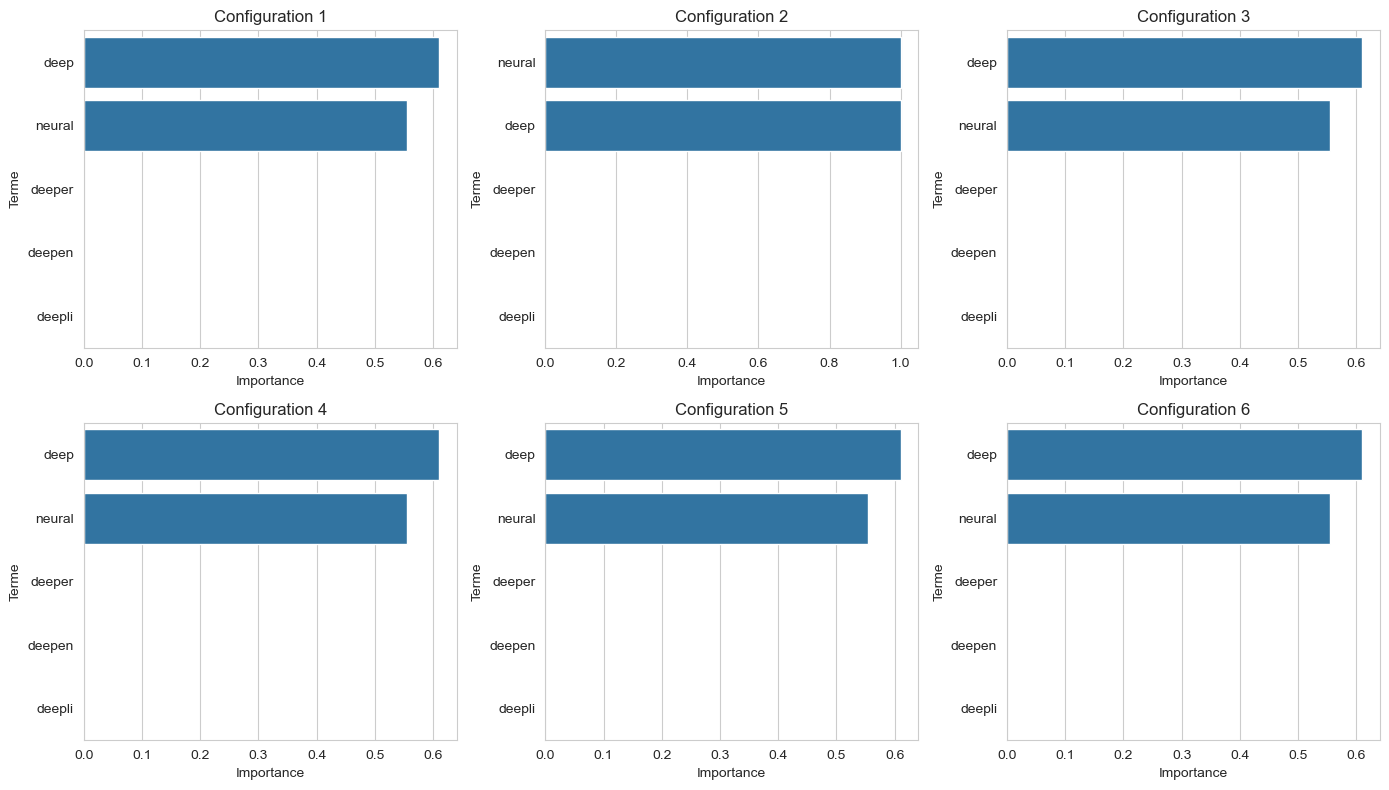

In [7]:
# 6. Comparaison des différentes configurations
# Créez et entraînez différentes variantes du moteur de recherche
variants = create_search_engine_variants()
for variant in variants:
    variant.fit(df)

# Choisissez une requête test
test_query = "deep learning neural networks"

# Comparez les résultats
compare_results = compare_search_results(variants, test_query)

# Visualisez l'importance des termes dans les différentes configurations
visualize_term_importance(variants, test_query)


## Interface interactive

In [ ]:
# 7. Interface interactive
search_interface(engine)


===== MOTEUR DE RECHERCHE D'ARTICLES SCIENTIFIQUES =====
Configuration: TF-IDF, Stemming, sans stopwords, min_df=5, max_df=0.95, similarité=cosine, vocabulaire=Pas de limite

Taille du vocabulaire: 13763
Nombre total d'articles: 79007

Entrez votre requête (ou 'q' pour quitter):
